## Problem 3: Stochastic Gradient Descent (30 points) ##
In class we covered the baseline stochastic gradient descent. Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [1]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

import seaborn as sns

# Apply the default theme
sns.set_theme()

  Cloning https://github.com/pantelis-classes/PRML.git to /tmp/pip-install-n08ix8u1/prml_0c2981426d1a4356b93634b0b8b82401
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /tmp/pip-install-n08ix8u1/prml_0c2981426d1a4356b93634b0b8b82401
  Resolved https://github.com/pantelis-classes/PRML.git to commit 14cf88538d2704fd18b391ae6309fb38c65a6412
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)

In [3]:
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

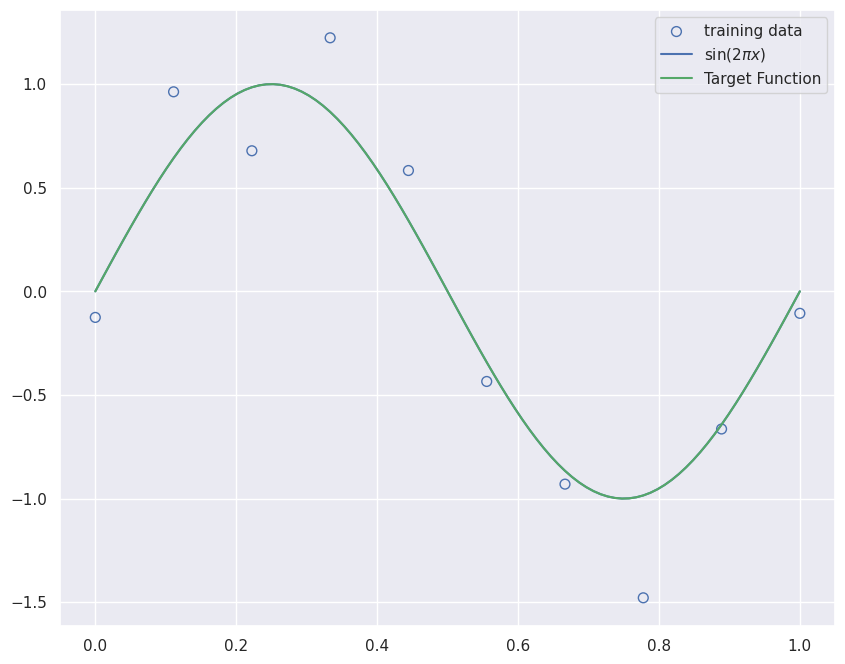

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#Professor code for creating this sindouail function going to modify it later on for shape
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.3254622701257022, 0.316573530505786, 0.3113329698255669, 0.21533230765813866, 0.30418297201350286, 0.28827113590504566, 0.271671290027623, 0.24111293276213336, 0.2027487924522371, 0.22384314947925912, 0.23268190302016592, 0.28078405461190864, 0.20726451611690713, 0.558447760263171, 0.3125085638070419, 0.22149652053151805, 0.21825056019229463, 0.31761029077607295, 0.32695780924780427, 0.2575627104107847, 0.21265330513574782, 0.2510604551013009, 0.23473083250416607, 0.27230529208891663, 0.19421666098400586, 0.20431004650372345, 0.20897537078304912, 0.19813711031272876, 0.20520167986213297, 0.18507243306598498, 0.22767457011097278, 0.21223442976955334, 0.22242939124506905, 0.20013147321384847, 0.18860690939700103, 0.21203256564729017, 0.22036744767682678, 0.18228984681181631, 0.1923579182958129, 0.21852874371095418, 0.18355969368296823, 0.18023586555541798, 0.3073685804449227, 0.1809428681052939, 0.18891669160413396, 0.2332024940032365, 0.2056307669316539, 0.23207739050030082, 0.190178

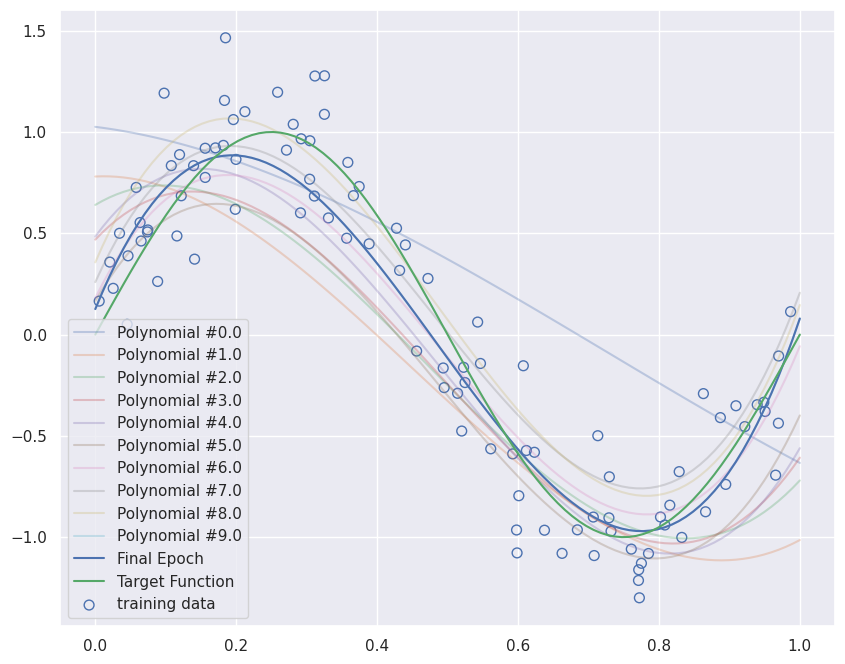

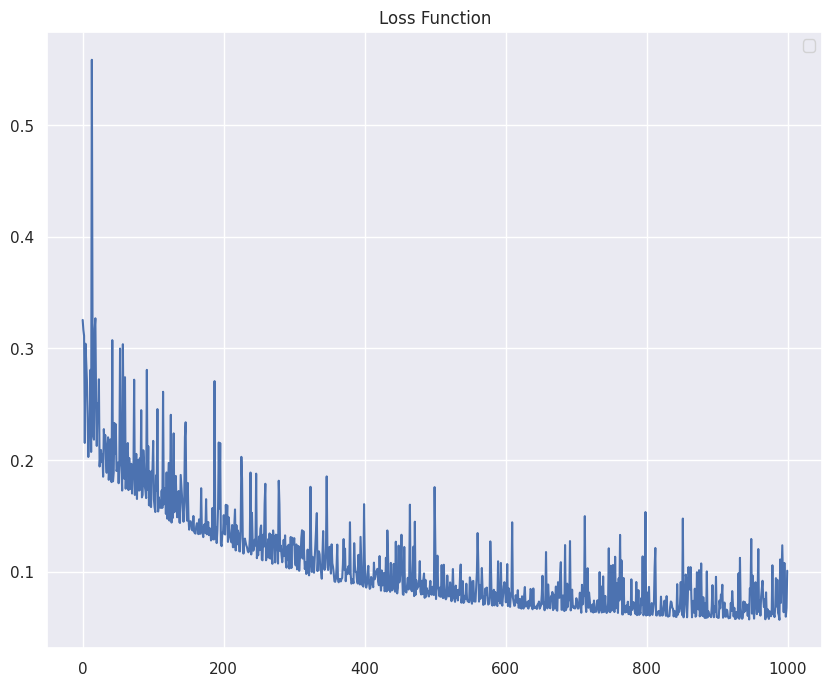

Hyperparameters;
Leraning Rate: 0.1 
Epochs: 1000


In [15]:
from sklearn.preprocessing import PolynomialFeatures, add_dummy_feature

np.random.seed(42)
n_epochs = 1000
t0, t1 = 5, 50  # learning schedule hyperparameters
m=100
# create the X and y with sin relationship
X = np.random.rand(m, 1)
y = sinusoidal(X) + np.random.normal(scale = 0.25, size = X.shape)
def learning_schedule(t):
    return t0 / (t + t1)
# keep track
losses = []
eta = 0.1
X_poly = PolynomialFeature(3).transform(X)
theta = np.random.randn(X_poly.shape[1], 1)

plt.figure(figsize=[10,8])

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_poly[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        #eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
    if epoch%100 == 0:
        x_line = np.linspace(0, 1, 100).reshape(-1, 1)
        X_line_poly = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x_line)
        y_line_poly = X_line_poly @ theta
        y_poly = X_poly @ theta
        plt.plot(x_line, y_line_poly, label=f'Polynomial #{epoch/100}', alpha=0.3)
    predictions = X_poly @ theta
    mse = np.mean((predictions - y) ** 2)
    losses.append(mse)


plt.plot(x_line, y_line_poly, label=f'Final Epoch')
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.scatter(X, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.legend()
plt.figure(figsize=[10,8])
# Plotting the training loss curve
print(losses,len(losses))
plt_loss = np.array(losses)
print(plt_loss.shape)
plt.plot(plt_loss)
# plt.ylim(-1, 1)
plt.title('Loss Function')
plt.legend()
plt.show()
print("Hyperparameters;\nLeraning Rate:",eta,"\nEpochs:",n_epochs)

## Problem 4: SGD Enhancements (30 points)
In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

Momentum (15 points)

Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

In [ ]:
#adam from textbook take some stuff
!pip install torchvision
!pip install torch
!pip install -U d2l
%matplotlib inline
import torch
from d2l import torch as d2l


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)
                                                       + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

33354.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


33361.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


33367.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


loss: 0.244, 0.070 sec/epoch


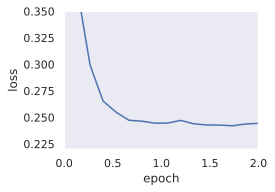

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
print("dat_iter:",data_iter,"dim:", feature_dim)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);
data_iter

epoch 20, x1: -0.943467, x2: -0.000073


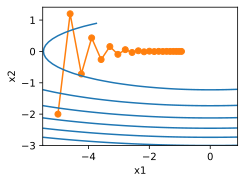

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

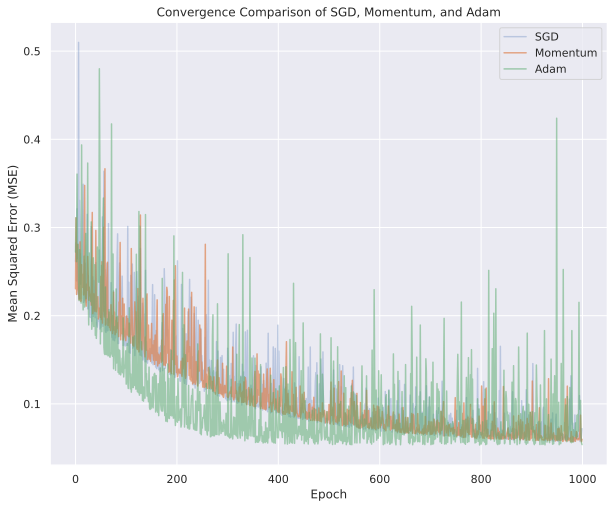

Final Parameters (SGD): [  0.05211802   8.90568952 -28.35989829  19.26433525]
Final Parameters (Momentum): [  0.21530509   8.85488525 -28.2954794   19.20906944]
Final Parameters (Adam): [ -0.08533916  10.94413175 -32.97454861  22.33879643]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# overall alot easier than part 1 in my opinon
inum = 100
np.random.seed(42)
X = np.random.rand(inum, 1)
y = sinusoidal(X) + np.random.normal(scale = 0.25, size = X.shape)

X_b = add_dummy_feature(X.reshape(-1, 1))  # add x0 = 1 to each instance

# Initialize model parameters randomly
theta_sgd = np.random.randn(2, 1)
theta_momentum = np.random.randn(2, 1)
theta_adam = np.random.randn(2, 1)

# Hyperparameters
eta = 0.1  # Learning rate 
beta = 0.9  # Momentum parameter i have no clue what it does
epsilon = 1e-9  # Small constant for numerical stability in Adam
beta1 = 0.9  # Exponential decay rate for the moment estimates in Adam
beta2 = 0.999  # Exponential decay rate for the squared moment estimates in Adam
m = 0  # Initialize 1st moment vector for Adam
v = 0  # Initialize 2nd moment vector for Adam
t = 0  # Initialize time step for Adam
n_epochs = 1000 

losses_sgd, losses_momentum, losses_adam = [], [], []

X_poly = PolynomialFeature(3).transform(X)
theta_sgd = np.random.randn(X_poly.shape[1], 1)

for epoch in range(n_epochs):
    for iteration in range(inum):
        random_index = np.random.randint(inum)
        xi = X_poly[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)  # for SGD, do not divide by m
        # i remvoed eta since I preset it
        theta_sgd = theta_sgd - eta * gradients
    predictions_sgd = X_poly @ theta_sgd
    mse_sgd = np.mean((predictions_sgd - y) ** 2)
    losses_sgd.append(mse_sgd)

# Momentum algorithm
X_poly = PolynomialFeature(3).transform(X)
theta_momentum = np.random.randn(X_poly.shape[1], 1)

for epoch in range(n_epochs):
    for i in range(inum):
        random_index = np.random.randint(inum)
        xi = X_poly[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta_momentum - yi)
        m = beta * m + (1 - beta) * gradients
        theta_momentum = theta_momentum - eta * m
    predictions_momentum = X_poly @ theta_momentum
    mse_momentum = np.mean((predictions_momentum - y) ** 2)
    losses_momentum.append(mse_momentum)

# Adam algorithm
X_poly = PolynomialFeature(3).transform(X)
theta_adam = np.random.randn(X_poly.shape[1], 1)
for epoch in range(n_epochs):
    for i in range(inum):
        random_index = np.random.randint(inum)
        xi = X_poly[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta_adam - yi)
        t += 1
        m = beta1 * m + (1 - beta1) * gradients
        v = beta2 * v + (1 - beta2) * gradients ** 2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        theta_adam = theta_adam - eta * m_hat / (np.sqrt(v_hat) + epsilon)
    predictions_adam = X_poly @ theta_adam
    mse_adam = np.mean((predictions_adam - y) ** 2)
    losses_adam.append(mse_adam)

plt.figure(figsize=[10, 8])
plt.plot(losses_sgd, label='SGD', alpha=0.3)
plt.plot(losses_momentum, label='Momentum', alpha = 0.7)
plt.plot(losses_adam, label='Adam', alpha = 0.5)

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Convergence Comparison of SGD, Momentum, and Adam')
plt.legend()
plt.show()
print('Final Parameters (SGD):', theta_sgd.flatten())
print('Final Parameters (Momentum):', theta_momentum.flatten())
print('Final Parameters (Adam):', theta_adam.flatten())
